## Figure 1. SHAPE-MaP improves structural characterization of human pri-miRNAs.
- 1C. Heatmap of SHAPE reactivity.
- 1E & S1D. Difference between the SHAPE-based and sequence-only structures.
- S1B. Prediction performance.
- S1C. Difference between base pairs in the SHAPE-based and sequence-only structures.
- S2A. SHAPE reactivities from in vivo SHAPE-MaP and in vitro SHAPE-MaP (ours).
- S2B. Structure models based on in vivo SHAPE, in vitro SHAPE, and sequence only. 
- S2C. Comparison between the structure models. 

In [2]:
import time
today = time.strftime('%Y-%m-%d')
name = 'S. Chan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by S. Chan Baek at 2024-01-25.


In [3]:
import os
HOME = '/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep'
SAVEPATH = '%s/%s/'%(HOME,time.strftime('%y%m%d'))
if not os.path.exists(SAVEPATH):
    os.makedirs(SAVEPATH)
print SAVEPATH
%cd $HOME

/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep/240125/
/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep


In [4]:
from __future__ import division
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from matplotlib import gridspec, lines, colors
from scipy.stats import pearsonr, mannwhitneyu, sem
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [5]:
s1 = pd.read_csv('publication/TableS1__Pri-miRNAs_selected_for_SHAPE-MaP.csv',index_col=0)
s2 = pd.read_csv('publication/TableS2__Constructs_used_in_this_study.csv',index_col=0)
s3 = pd.read_csv('publication/TableS3_2__SHAPE_reactivity.csv',index_col=0)
s3.columns = range(1,126)
s3cnts = pd.read_csv('publication/TableS3_1__Read_counts.csv',index_col=0)
s3shan = pd.read_csv('publication/TableS3_3__Shannon_entropy.csv',index_col=0)
s3shan.columns = range(1,126)
s3shan = s3shan.fillna(0)
s4str = pd.read_csv('publication/TableS4_1__SHAPE-based_pri-miRNA_structures.csv',index_col=0)
s4str.columns = range(1,126)
s4 = pd.read_csv('publication/TableS4_2__Structural_features_of_pri-miRNAs.csv',index_col=0)
constseqs = s2['Construct sequence'].to_dict()
folded = list(s4.index)
print len(folded)

476


In [6]:
def get_pre_position(mir):
    constseq = constseqs[mir].replace('T','U')
    preseq = s1.loc[mir, 'Precursor']
    return constseq.find(preseq)+1, constseq.find(preseq)+len(preseq)

### 1C. Reactivity landscape

In [7]:
xmin, xmax = -23, 32
rts5, rts3 = pd.DataFrame(columns=range(xmin,xmax)), pd.DataFrame(columns=range(xmin,xmax))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = s3.T[mir].reindex(range(ps+xmin,ps+xmax))
    sub3 = s3.T[mir].reindex(range(pe-xmax+1,pe-xmin+1))
    sub5.index = range(xmin,xmax)
    sub3.index = range(xmin,xmax)[::-1]
    rts5.loc[mir] = sub5
    rts3.loc[mir] = sub3

In [8]:
ys5 = rts5.apply(lambda x: np.average(x.dropna()))
ys3 = rts3.apply(lambda x: np.average(x.dropna()))
cs5, cs3 = [], []
for y in ys5:
    if y<.4: cs5.append('grey')
    elif .4<=y<.85: cs5.append('orange')
    else: cs5.append('tab:red')
for y in ys3:
    if y<.4: cs3.append('grey')
    elif .4<=y<.85: cs3.append('orange')
    else: cs3.append('tab:red')   
xs = range(xmin,xmax)

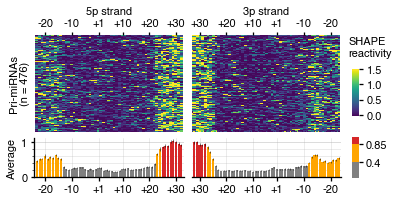

In [9]:
fig = plt.figure(figsize=(5.5,2.6))
gs = gridspec.GridSpec(2, 2, height_ratios=(5,2))
ax11 = fig.add_subplot(gs[0]); ax21 = fig.add_subplot(gs[1])
ax12 = fig.add_subplot(gs[2]); ax22 = fig.add_subplot(gs[3])

for ax1,ax2,t,ys,cs in zip([ax11,ax21],[ax12,ax22],[rts5,rts3],[ys5,ys3],[cs5,cs3]):
    ye = t.apply(lambda x: sem(x.dropna()))
    im = ax1.pcolor(t, vmax=1.5, vmin=-.03)
    ax2.bar(xs,ys,color=cs,yerr=ye,zorder=2,error_kw={'elinewidth':.5,'zorder':3})
    ax1.set_xlim(-.5,xmax-xmin+.5)
    ax2.set_xlim(xmin-1,xmax); ax2.set_ylim(0,1.1)
    ax2.set_xticks([-20,-10,0,9,19,29])
    ax2.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax1.set_xticks(np.array([-20,-10,0,9,19,29])+23.5)
    ax1.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    
    ax1.set_yticks([]); ax2.set_yticks([0,.5,1])
    ax1.spines['left'].set_visible(False); ax1.spines['bottom'].set_visible(False)
    ax2.grid(ls='-', lw=.5, which='Both')
    ax2.set_yticks([0,1]); ax2.set_yticks(np.arange(0,1.1,.2),minor=True)
ax22.set_yticklabels([]); ax22.spines['left'].set_visible(False)
ax22.tick_params(left='off',which='both')
ax21.invert_xaxis(); ax22.invert_xaxis()
    
axcb = fig.add_axes([.926,.45,.02,.25])
cb = plt.colorbar(im, cax=axcb)
cb.set_ticks([0,.5,1,1.5])
cb.outline.set_linewidth(0); cb.solids.set_rasterized(True)
axcb.text(-.4, 1.28, 'SHAPE\nreactivity',fontsize=11)

axb = fig.add_axes([.925,.12,.02,.22])
axb.bar([0],[.4],color='grey')
axb.bar([0],[.45],color='orange',bottom=[.4])
axb.bar([0],[.2],color='tab:red',bottom=[.85])
axb.yaxis.set_ticks_position('right'); axb.set_ylim(0,1.05)
axb.set_xticks([]); axb.set_yticks([.4,.85]); axb.set_yticklabels(['0.4','0.85']) 
axb.spines['left'].set_visible(False); axb.spines['bottom'].set_visible(False)

ax11.set_xlabel('5p strand')
ax21.set_xlabel('3p strand')

ax11.set_ylabel('Pri-miRNAs\n(n = %s)'%len(folded))
ax12.set_ylabel('Average')

fig.subplots_adjust(wspace=.05, hspace=.1)
#fig.savefig(resultpath + '230717_f1c__reactivity_distribution.pdf',dpi=300)

### 1D. Difference between the SHAPE-based and sequence-only structures

In [10]:
def split_ct(ctfile):
    infos = open(ctfile, 'rt').read()
    length = int(infos.split('\n')[0].strip().split()[0])
    rna = infos.split('\n')[0].strip().split()[-1]
    nstrt = infos.count(rna)
    splitinfos = []
    for i in range(nstrt):
        lines = infos.split('\n')[1+(1+length)*i:(1+length)*(i+1)]
        splitinfos.append([ tuple(map(int,l.strip().split()[4:6][::-1])) for l in lines ])
    return splitinfos

In [112]:
# RNAstructure
shapests = pd.DataFrame(index=folded,columns=range(1,126))
silicsts = pd.DataFrame(index=folded,columns=range(1,126))
for m in folded:
    shapests.loc[m] = s4str.loc[m]
    silicct = 'publication/structures/RNAstructure/%s.ct'%m
    silicsts.loc[m] = pd.Series(dict(split_ct(silicct)[0]))

In [113]:
xmin5, xmax5 = -23, 32
xmin3, xmax3 = -23, 32
shsts5 = pd.DataFrame(columns=range(xmin5,xmax5))
shsts3 = pd.DataFrame(columns=range(xmin3,xmax3))
sists5 = pd.DataFrame(columns=range(xmin5,xmax5))
sists3 = pd.DataFrame(columns=range(xmin3,xmax3))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = shapests.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = shapests.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    shsts5.loc[mir] = sub5
    shsts3.loc[mir] = sub3
    
    sub5 = silicsts.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = silicsts.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    sists5.loc[mir] = sub5
    sists3.loc[mir] = sub3

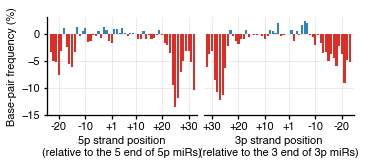

In [114]:
ys5 = ((shsts5>0).sum()-(sists5>0).sum())/len(folded)*100
ys3 = ((shsts3>0).sum()-(sists3>0).sum())/len(folded)*100
xs = range(xmin5,xmax5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5.5,1.8))
for ax,ys in zip([ax1,ax2],[ys5,ys3]):
    cs = ['#de2d26' if y<=0 else '#3182bd' for y in ys ]
    ax.bar(xs,ys,color=cs,zorder=2)
    ax.grid(ls='-',lw=.5)
    ax.set_xlim(xmin-1.5,xmax)
    ax.set_ylim(-15,3)
    ax.set_xticks([-20,-10,0,9,19,29])
    ax.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax.set_yticks(range(-15,1,5))    

ax2.invert_xaxis()
ax1.set_ylabel('Base-pair frequency (%)')
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.tick_params(left='off')
ax1.set_xlabel('5p strand position\n(relative to the 5 end of 5p miRs)')
ax2.set_xlabel('3p strand position\n(relative to the 3 end of 3p miRs)')
fig.subplots_adjust(wspace=.05)
#fig.savefig(resultpath + '230710_s1d__pairing_diff_rnastructure.pdf')

### S1B. Control RNAs

In [14]:
controls = [ 'IRES-domainII', 'U1-snRNA', 'Yeast-tRNAasp' ]
scorer = '/casa/bsc/bin/RNAstructure/exe/scorer'

In [15]:
def get_ct_info(ct):
    lines = open(ct, 'rt').read().split('\n')[1:-1]
    return [ tuple(map(int, l.strip().split()[4:6][::-1])) for l in lines ]

In [16]:
accs = {}
lens = {}
for ctl in controls:
    shapect = 'publication/structures/SHAPE/%s.ct'%ctl
    refct = 'publication/controls/%s_ref.ct'%ctl
    scof = 'publication/structures/SHAPE/touch'
    result = !$scorer $shapect $refct $scof --print
    sensitivity = float(result[6].strip().split(' = ')[1][:-1])
    ppv = float(result[7].strip().split(' = ')[1][:-1])
    accs[ctl] = np.array([sensitivity,ppv])/100    
    cts = get_ct_info(refct)
    lens[ctl] = len(cts)

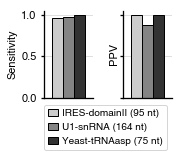

In [17]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(2.3,1.6), sharey=True)
cs = '#cccccc #848484 #323232'.split()
ds = [-.2,0,.2]
for ctl,c,d in zip(controls,cs,ds):
    ax1.bar([d],[accs[ctl][0]],color=c,label='%s (%s nt)'%(ctl,lens[ctl]),width=.2,
           edgecolor='k',lw=1,zorder=2)
    ax2.bar([d],[accs[ctl][1]],color=c,label='%s (%s nt)'%(ctl,lens[ctl]),width=.2,
           edgecolor='k',lw=1,zorder=2)

for ax in [ax1,ax2]:
    ax.set_xlim(-.45,.45)
    ax.yaxis.grid(ls='-')
    ax.set_xticks([])
    
ax1.set_ylabel('Sensitivity')
ax2.set_ylabel('PPV')
ax1.legend(loc=(0,-.6),handlelength=1,handletextpad=.4)
fig.subplots_adjust(wspace=.6)
#fig.savefig(resultpath + '230627_s1b__controls.pdf')

### S1C. Difference between SHAPE-based and sequence-only (base-pairs)

In [18]:
comp = {}
for m in folded:
    shapect = 'publication/structures/SHAPE/%s.ct'%m
    silicct = 'publication/structures/RNAstructure/%s.ct'%m
    scof = 'publication/structures/SHAPE/touch'
    result = !$scorer $silicct $shapect $scof -n 1 --print
    sensitivity = float(result[6].strip().split(' = ')[1][:-1])
    ppv = float(result[7].strip().split(' = ')[1][:-1])
    comp[m] = (sensitivity,ppv)

290


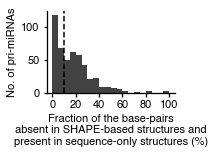

In [19]:
## ppv: fraction of predicted base-pairs that are actually in reference (SHAPE)
xs = np.arange(0,100,5)+2.5
bins = np.arange(0,101,5)
ys,ts = np.histogram(100-np.array(zip(*comp.values())[1]),bins=bins)
print sum(ys[2:])

fig, ax = plt.subplots(1, 1, figsize=(2.3,1.5))
ax.bar(xs,ys,width=5,color='#424242',zorder=2)
ax.set_xlabel('Fraction of the base-pairs\nabsent in SHAPE-based structures and\n\
present in sequence-only structures (%)')
ax.set_ylabel('No. of pri-miRNAs')
ax.set_xticks(range(0,101,20))
ax.set_yticks(range(0,101,50))

ax.axvline(10,color='k',ls='--')
#fig.savefig(resultpath + '230710_s1_comparison_shape_rnastructure_ppv.pdf')

### S1D. Difference between SHAPE-based and sequence-only (bp frequency)¶

In [20]:
## RNAfold
shapests = pd.DataFrame(index=folded,columns=range(1,126))
silicsts = pd.DataFrame(index=folded,columns=range(1,126))
for m in folded:
    shapests.loc[m] = s4str.loc[m]
    silicct = 'publication/structures/RNAfold/%s.ct'%m
    silicsts.loc[m] = pd.Series(dict(split_ct(silicct)[0]))
    
xmin5, xmax5 = -23, 32
xmin3, xmax3 = -23, 32
shsts5 = pd.DataFrame(columns=range(xmin5,xmax5))
shsts3 = pd.DataFrame(columns=range(xmin3,xmax3))
sists5 = pd.DataFrame(columns=range(xmin5,xmax5))
sists3 = pd.DataFrame(columns=range(xmin3,xmax3))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = shapests.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = shapests.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    shsts5.loc[mir] = sub5
    shsts3.loc[mir] = sub3
    
    sub5 = silicsts.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = silicsts.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    sists5.loc[mir] = sub5
    sists3.loc[mir] = sub3

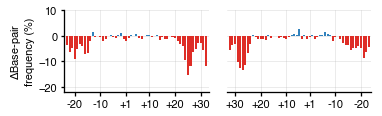

In [21]:
ys5 = ((shsts5>0).sum()-(sists5>0).sum())/len(folded)*100
ys3 = ((shsts3>0).sum()-(sists3>0).sum())/len(folded)*100
xs = range(xmin5,xmax5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5.5,1.5))
for ax,ys in zip([ax1,ax2],[ys5,ys3]):
    cs = ['#de2d26' if y<=0 else '#3182bd' for y in ys ]
    ax.bar(xs,ys,color=cs,zorder=2)
    ax.grid(ls='-',lw=.5)
    ax.set_xlim(xmin5-1,xmax5)
    ax.set_ylim(-22,10)
    ax.set_xticks([-20,-10,0,9,19,29])
    ax.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax.set_yticks(range(-20,11,10))

ax2.invert_xaxis()
ax1.set_ylabel('$\Delta$Base-pair\nfrequency (%)')
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.tick_params(left='off')
#ax1.set_xlabel('5p strand position\n(relative to the 5$^\prime$ end of 5p miRs)')
#ax2.set_xlabel('3p strand position\n(relative to the 3$^\prime$ end of 3p miRs)')
fig.subplots_adjust(wspace=.13)
#fig.savefig(resultpath + '230710_s1d__pairing_diff_rnafold.pdf')

In [22]:
## mfold
shapests = pd.DataFrame(index=folded,columns=range(1,126))
silicsts = pd.DataFrame(index=folded,columns=range(1,126))
for m in folded:
    shapests.loc[m] = s4str.loc[m]
    silicct = 'publication/structures/mfold/%s.ct'%m
    silicsts.loc[m] = pd.Series(dict(split_ct(silicct)[0]))
    
xmin5, xmax5 = -23, 32
xmin3, xmax3 = -23, 32
shsts5 = pd.DataFrame(columns=range(xmin5,xmax5))
shsts3 = pd.DataFrame(columns=range(xmin3,xmax3))
sists5 = pd.DataFrame(columns=range(xmin5,xmax5))
sists3 = pd.DataFrame(columns=range(xmin3,xmax3))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = shapests.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = shapests.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    shsts5.loc[mir] = sub5
    shsts3.loc[mir] = sub3
    
    sub5 = silicsts.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = silicsts.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    sists5.loc[mir] = sub5
    sists3.loc[mir] = sub3

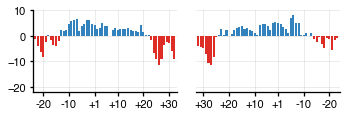

In [23]:
ys5 = ((shsts5>0).sum()-(sists5>0).sum())/len(folded)*100
ys3 = ((shsts3>0).sum()-(sists3>0).sum())/len(folded)*100
xs = range(xmin5,xmax5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5.5,1.5))
for ax,ys in zip([ax1,ax2],[ys5,ys3]):
    cs = ['#de2d26' if y<=0 else '#3182bd' for y in ys ]
    ax.bar(xs,ys,color=cs,zorder=2)
    ax.grid(ls='-',lw=.5)
    ax.set_xlim(xmin5-1,xmax5)
    ax.set_ylim(-22,10)
    ax.set_xticks([-20,-10,0,9,19,29])
    ax.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax.set_yticks(range(-20,11,10))

ax2.invert_xaxis()
#ax1.set_ylabel('$\Delta$Base-pair\nfrequency (%)')
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.tick_params(left='off')
#ax1.set_xlabel('5p strand position\n(relative to the 5$^\prime$ end of 5p miRs)')
#ax2.set_xlabel('3p strand position\n(relative to the 3$^\prime$ end of 3p miRs)')
fig.subplots_adjust(wspace=.13)
#fig.savefig(resultpath + '230710_s1d__pairing_diff_mfold.pdf')

In [24]:
## contrafold
shapests = pd.DataFrame(index=folded,columns=range(1,126))
silicsts = pd.DataFrame(index=folded,columns=range(1,126))
for m in folded:
    shapests.loc[m] = s4str.loc[m]
    silicct = 'publication/structures/contrafold/%s.ct'%m
    silicsts.loc[m] = pd.Series(dict(split_ct(silicct)[0]))
    
xmin5, xmax5 = -23, 32
xmin3, xmax3 = -23, 32
shsts5 = pd.DataFrame(columns=range(xmin5,xmax5))
shsts3 = pd.DataFrame(columns=range(xmin3,xmax3))
sists5 = pd.DataFrame(columns=range(xmin5,xmax5))
sists3 = pd.DataFrame(columns=range(xmin3,xmax3))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = shapests.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = shapests.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    shsts5.loc[mir] = sub5
    shsts3.loc[mir] = sub3
    
    sub5 = silicsts.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = silicsts.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    sists5.loc[mir] = sub5
    sists3.loc[mir] = sub3

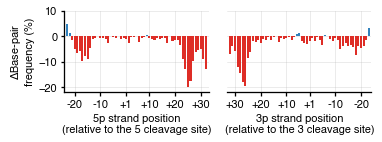

In [25]:
ys5 = ((shsts5>0).sum()-(sists5>0).sum())/len(folded)*100
ys3 = ((shsts3>0).sum()-(sists3>0).sum())/len(folded)*100
xs = range(xmin5,xmax5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5.5,1.5))
for ax,ys in zip([ax1,ax2],[ys5,ys3]):
    cs = ['#de2d26' if y<=0 else '#3182bd' for y in ys ]
    ax.bar(xs,ys,color=cs,zorder=2)
    ax.grid(ls='-',lw=.5)
    ax.set_xlim(xmin5-1,xmax5)
    ax.set_ylim(-22,10)
    ax.set_xticks([-20,-10,0,9,19,29])
    ax.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax.set_yticks(range(-20,11,10))

ax2.invert_xaxis()
ax1.set_ylabel('$\Delta$Base-pair\nfrequency (%)')
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.tick_params(left='off')
ax1.set_xlabel('5p strand position\n(relative to the 5 cleavage site)')
ax2.set_xlabel('3p strand position\n(relative to the 3 cleavage site)')
fig.subplots_adjust(wspace=.13)
#fig.savefig(resultpath + '230710_s1d__pairing_diff_contrafold.pdf')

In [26]:
## EternaFold
shapests = pd.DataFrame(index=folded,columns=range(1,126))
silicsts = pd.DataFrame(index=folded,columns=range(1,126))
for m in folded:
    shapests.loc[m] = s4str.loc[m]
    silicct = 'publication/structures/eternafold/%s.ct'%m
    silicsts.loc[m] = pd.Series(dict(split_ct(silicct)[0]))
    
xmin5, xmax5 = -23, 32
xmin3, xmax3 = -23, 32
shsts5 = pd.DataFrame(columns=range(xmin5,xmax5))
shsts3 = pd.DataFrame(columns=range(xmin3,xmax3))
sists5 = pd.DataFrame(columns=range(xmin5,xmax5))
sists3 = pd.DataFrame(columns=range(xmin3,xmax3))
for mir in folded:
    ps, pe = get_pre_position(mir)
    sub5 = shapests.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = shapests.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    shsts5.loc[mir] = sub5
    shsts3.loc[mir] = sub3
    
    sub5 = silicsts.T[mir].reindex(range(ps+xmin5,ps+xmax5))
    sub3 = silicsts.T[mir].reindex(range(pe-xmax3+1,pe-xmin3+1))
    sub5.index = range(xmin5,xmax5)
    sub3.index = range(xmin3,xmax3)[::-1]
    sists5.loc[mir] = sub5
    sists3.loc[mir] = sub3

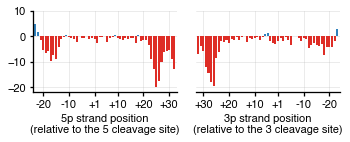

In [27]:
ys5 = ((shsts5>0).sum()-(sists5>0).sum())/len(folded)*100
ys3 = ((shsts3>0).sum()-(sists3>0).sum())/len(folded)*100
xs = range(xmin5,xmax5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5.5,1.5))
for ax,ys in zip([ax1,ax2],[ys5,ys3]):
    cs = ['#de2d26' if y<=0 else '#3182bd' for y in ys ]
    ax.bar(xs,ys,color=cs,zorder=2)
    ax.grid(ls='-',lw=.5)
    ax.set_xlim(xmin5-1,xmax5)
    ax.set_ylim(-22,10)
    ax.set_xticks([-20,-10,0,9,19,29])
    ax.set_xticklabels([-20,-10,'+1','+10','+20','+30'])
    ax.set_yticks(range(-20,11,10))

ax2.invert_xaxis()
#ax1.set_ylabel('$\Delta$Base-pair\nfrequency (%)')
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.tick_params(left='off')
ax1.set_xlabel('5p strand position\n(relative to the 5 cleavage site)')
ax2.set_xlabel('3p strand position\n(relative to the 3 cleavage site)')
fig.subplots_adjust(wspace=.13)
#fig.savefig(resultpath + '230710_s1d__pairing_diff_eternafold.pdf')

### S2A-B. SHAPE reactivities and structure models from in vivo SHAPE-MaP and in vitro SHAPE-MaP (ours) 

In [28]:
# files in counted_mutations were made by Snakefile
def get_info_from_csv(csv, item): # item is 'mutation rate' or 'depth'
    csvtbl = pd.read_csv(csv, index_col=2)
    infos = [ float(r) for r in csvtbl.loc[item].values[2:-1] ]
    return infos

def get_reactivity(amplicon,rep,normperc=90):
    csvpath = 'publication/in_vivo_SHAPE/counted_mutations'
    conditions = ['plus','minus','denat']
    mutrs = {}
    for cond in conditions:
        sample = '%s_%s_rep%s'%(amplicon.split('_')[0],cond,rep)
        csv = '%s/%s_%s.csv'%(csvpath,sample,amplicon)
        mutrs[cond] = get_info_from_csv(csv,'mutation rate')
    dcsample = '%s_denat_rep%s'%(amplicon.split('_')[0],rep)
    dcdepths = get_info_from_csv('%s/%s_%s.csv'%(csvpath,dcsample,amplicon),'depth')
    pseudo = min(.0005,1/max(dcdepths))
    rawrts = [ (p-m+pseudo)/(d+pseudo) if p>m else 0 for p,m,d in zip(mutrs['plus'],mutrs['minus'],mutrs['denat']) ]
    normrts = [ rt / np.percentile(rawrts,normperc) for rt in rawrts ]
    return normrts

def smooth(vs,window=3):
    newlen = len(vs)-(window-1)
    newvs = np.array([0.]*newlen)
    for i in range(window):
        newvs = newvs + np.array(vs[i:newlen+i])
    return [sum(vs[:2])/2] + list(newvs/window) + [sum(vs[-2:])/2]

def count_ustempairs(ctinfo, ps, pe, me5p, ms3p):
    return len([(i,p) for i,p in ctinfo if ps<=i<=me5p and ms3p-2<=p<=pe-2])

def count_lstempairs(ctinfo, ps, pe):
    return len([(i,p) for i,p in ctinfo if ps-13<=i<ps and pe-2<p<=pe+11])

def measure_asymmetry(ctinfo, ps, pe, me5p, ms3p):
    pairs = [(i,p) for i,p in ctinfo if i<me5p and p>=ms3p]
    stems = [(i,p) for i,p in pairs if ps-9<=i<=ps+15 or pe-15<=p<=pe+8]
    consecps = zip(stems[:-1],stems[1:])
    return max([abs((i2-i1)-(p1-p2)) for (i1,p1),(i2,p2) in consecps]+[-999])

In [29]:
# amplseqf = 'publication/in_vivo_SHAPE/Rat2023_amplicon_seqs.fa'
# for s in SeqIO.parse(amplseqf,'fasta'):
#     with open('publication/in_vivo_SHAPE/%s.fa'%(s.id),'wt') as out:
#         out.write('>%s\n%s'%(s.id,str(s.seq).replace('T','U')))

In [84]:
fold = '/casa/bsc/bin/RNAstructure/exe/Fold'
datapath = '/casa/bsc/bin/RNAstructure/data_tables'
pvclient = '/casa/bsc/bin/ShapeMapper_v1.2/pvclient.py'
%env DATAPATH $datapath

env: DATAPATH=/casa/bsc/bin/RNAstructure/data_tables


In [85]:
SUBPATH = 'publication/in_vivo_SHAPE'
AMPLICONS = ['p2_1_453','p1_271_829']
REP = 1
PRI5L,PRI3L = 20,20

reacts = {}
for ampl in AMPLICONS:
    rts = get_reactivity(ampl,REP)
    rts = [-999]*PRI5L + rts[PRI5L:len(rts)-PRI3L] + [-999]*PRI3L
    with open('%s/%s_rep%s.shape' % (SUBPATH,ampl,REP),'wt') as out:
        out.write('\n'.join(['%s\t%s'%(i+1,rt) for i,rt in enumerate(rts)]))
    reacts[ampl] = rts
    
    seqfile = '%s/%s.fa' % (SUBPATH,ampl)
    rtsfile = '%s/%s_rep%s.shape' % (SUBPATH,ampl,REP)
    ctfile = '%s/%s_rep%s.ct' % (SUBPATH,ampl,REP)
    outfile = '%s/%s_rep%s' % (SUBPATH,ampl,REP)
    out = !$fold $seqfile $ctfile -sh $rtsfile

In [31]:
kims2file = 'publication/Kim2021_TableS2.xlsx'
kims2 = pd.ExcelFile(kims2file).parse('s2. Pri-miRNA constructs',header=9,index_col=0)
kims2.head(1)

,Chr,Start,End,Strand,Construct sequence (125 nt),5' flanking segment,Pre-miRNA,3' flanking segment
Pri-miRNA,,,,,,,,
hsa-let-7a-1,chr9,94175938,94176062,+,CTGGATGTTCTCTTCACTGTGGGATGAGGTAGTAGGTTGTATAGTT...,CUGGAUGUUCUCUUCACUGUGGGA,UGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCACUGGGA...,CUAACGUGAUAGAAAAGUCUGCAUCCAGG


In [32]:
AMPL2_ST,AMPL1_ST = 91350583,91350853
AMPL2_MIR = ['hsa-mir-17','hsa-mir-18a','hsa-mir-19a']
AMPL1_MIR = ['hsa-mir-19b-1','hsa-mir-92a-1']
ALLMIRS = ['hsa-mir-17','hsa-mir-18a','hsa-mir-19a','hsa-mir-19b-1','hsa-mir-92a-1']
relstarts = {}
for m in ALLMIRS:
    mstart = kims2.loc[m,'Start']
    if m in AMPL1_MIR:
        relstarts[m] = mstart - AMPL1_ST
    else:
        relstarts[m] = mstart - AMPL2_ST

In [87]:
ampl = AMPLICONS[0] # 2 -> 17th structure
ctfile = '%s/%s_rep%s.ct' % (SUBPATH,ampl,REP)
data = {}
for i,ctinfo in enumerate(split_ct(ctfile)):
    data[i+1] = {}
    for m in AMPL2_MIR:
        relst = relstarts[m]
        ps, pe = get_pre_position(m)
        ps += relst
        pe += relst
        lspairs = count_lstempairs(ctinfo, ps, pe)
        data[i+1][m] = lspairs
pd.DataFrame(data)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
hsa-mir-17,6,11,6,6,6,6,6,6,6,6,6,6,10,6,6,6,6,0,6,0
hsa-mir-18a,0,0,0,0,0,0,9,0,0,0,0,9,0,9,0,0,0,0,0,0
hsa-mir-19a,11,11,11,11,11,11,11,11,11,11,11,7,11,5,11,11,11,11,11,11


In [88]:
ampl = AMPLICONS[0] # 2 -> 17th structure
ctfile = '%s/%s_rep%s.ct' % (SUBPATH,ampl,2)
data = {}
for i,ctinfo in enumerate(split_ct(ctfile)):
    data[i+1] = {}
    for m in AMPL2_MIR:
        relst = relstarts[m]
        ps, pe = get_pre_position(m)
        ps += relst
        pe += relst
        lspairs = count_lstempairs(ctinfo, ps, pe)
        data[i+1][m] = lspairs
pd.DataFrame(data)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
hsa-mir-17,6,6,6,6,10,6,6,6,6,6,6,6,11,6,6,6,11,6,0,0
hsa-mir-18a,0,9,0,0,0,0,0,0,0,0,3,0,0,0,0,0,9,9,0,0
hsa-mir-19a,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,5,11,11


In [34]:
ampl = AMPLICONS[1] # 2 -> 2nd structure after manual inspection
ctfile = '%s/%s_rep%s.ct' % (SUBPATH,ampl,REP)
data = {}
for i,ctinfo in enumerate(split_ct(ctfile)):
    data[i+1] = {}
    for m in AMPL1_MIR:
        relst = relstarts[m]
        ps, pe = get_pre_position(m)
        ps += relst
        pe += relst
        lspairs = count_lstempairs(ctinfo, ps, pe)
        data[i+1][m] = lspairs
pd.DataFrame(data)

,1,2,3,4,5,6,7,8
hsa-mir-19b-1,11,11,11,11,11,0,11,0
hsa-mir-92a-1,2,2,7,2,2,2,2,2


In [35]:
PRIMER_BS = {'hsa-mir-17':(15,0),'hsa-mir-18a':(0,0),'hsa-mir-19a':(0,0),'hsa-mir-19b-1':(0,0),'hsa-mir-92a-1':(0,27)}
subrts_vivo, subrts_vitro = {}, {}
for m in ALLMIRS:
    subrts_vitro[m] = s3.loc[m].tolist()
    relst = relstarts[m]
    if m in AMPL1_MIR:
        rts = reacts[AMPLICONS[1]]
    else:
        rts = reacts[AMPLICONS[0]]
    pbsst,pbsen = PRIMER_BS[m]
    subrts_vivo[m] = [-999]*pbsst + rts[relst+pbsst:relst+125-pbsen] + [-999]*pbsen

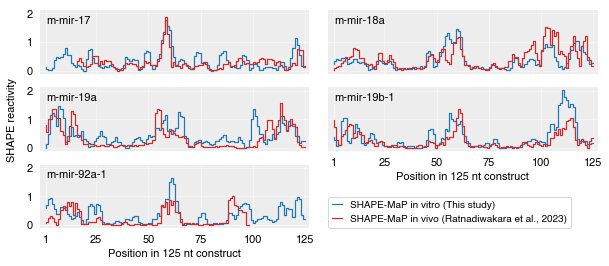

In [37]:
fig,axes = plt.subplots(3, 2, figsize=(10,4), sharey=True)
fig.subplots_adjust(hspace=.5)

for m,ax in zip(ALLMIRS,axes.flatten()):
    xs_vivo = [i+1 for i,r in enumerate(subrts_vivo[m]) if r>-999]
    ys_vivo = smooth([r for r in subrts_vivo[m] if r>-999])
    xs_vitr = range(1,126)
    ys_vitr = smooth(subrts_vitro[m])

    ax.step(xs_vitr,ys_vitr,color='tab:blue',lw=1.2,label='SHAPE-MaP in vitro (This study)',zorder=2)
    ax.step(xs_vivo,ys_vivo,color='tab:red',lw=1.2,label='SHAPE-MaP in vivo (Ratnadiwakara et al., 2023)',zorder=2)
    
    ax.set_xlim(-2,127)
    ax.set_xticks([1]+range(25,126,25))
    ax.set_xticklabels([])
    ax.set_yticks(range(3))
    ax.text(1,1.65,m.replace('hsa','m'),fontsize=11)
    ax.spines['bottom'].set_bounds(1,125)
    ax.spines['left'].set_bounds(0,2.1)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(ls='-',color='w')
    ax.set_facecolor('#ededed')
    ax.tick_params(left='off',bottom='off')

axes[1][1].set_xticklabels([1]+range(25,126,25))
axes[2][0].set_xticklabels([1]+range(25,126,25))
axes[1][1].set_xlabel('Position in 125 nt construct')
axes[2][0].set_xlabel('Position in 125 nt construct')
ax.legend(loc=(1.07,0),handlelength=1)

fig.text(.08,.5,'SHAPE reactivity',va='center',rotation=90,fontsize=11)
fig.subplots_adjust(wspace=.07,hspace=.22)
fig.delaxes(axes[2][1])
#fig.savefig('reactivity_comparison.pdf')

### S2C. Comparison between the structure models

In [38]:
def scorer(pairs_ref, pairs_comp):
    both = set(pairs_ref)&set(pairs_comp)
    sensitivity = len(both)/len(pairs_ref)*100
    ppv = len(both)/len(pairs_comp)*100
    return round(sensitivity,1), round(ppv,1)

In [99]:
PARAMS = {'AMPLICON':{'hsa-mir-17':'p2_1_453', 'hsa-mir-18a':'p2_1_453', 'hsa-mir-19a':'p2_1_453',
                      'hsa-mir-19b-1':'p1_271_829', 'hsa-mir-92a-1':'p1_271_829'},
          'CTNUM':{'hsa-mir-17':17, 'hsa-mir-18a':17, 'hsa-mir-19a':17,'hsa-mir-19b-1':3, 'hsa-mir-92a-1':3}}
WIN = 15

In [110]:
sens_shape, ppvs_shape = [],[]
sens_seqon, ppvs_seqon = [],[]
for m in ALLMIRS[:4]:
    ps, pe = get_pre_position(m)
    ctfile = 'publication/in_vivo_SHAPE/%s_rep2.ct' % PARAMS['AMPLICON'][m]
    ctnum = PARAMS['CTNUM'][m]
    relst = relstarts[m]
    ctinfo_vivo = split_ct(ctfile)[ctnum-1][relst:relst+125][ps-WIN:pe+WIN]
    ctinfo_vivo = [(i-relst,p-relst) if p>0 else (i-relst,0) for i,p in ctinfo_vivo]
    exclude_pos = [i for i,p in ctinfo_vivo if p>125]
    pairs_vivo = [(i,p) for i,p in ctinfo_vivo if 0<p<=125]    
    pairs_vitro = [(i,p) for i,p in s4str.loc[m].items() if 0<p and i not in exclude_pos and ps-WIN<=i<pe+WIN]

    ctinfo_seqonly = split_ct('publication/structures/RNAstructure/%s.ct'%m)[0]
    pairs_seqonly = [(i,p) for i,p in ctinfo_seqonly if 0<p and i not in exclude_pos and ps-WIN<=i<pe+WIN]
    
    sen_shape, ppv_shape = scorer(pairs_vivo, pairs_vitro)
    sen_seqon, ppv_seqon = scorer(pairs_vivo,pairs_seqonly)
    sens_shape.append(sen_shape)
    ppvs_shape.append(ppv_shape)
    sens_seqon.append(sen_seqon)
    ppvs_seqon.append(ppv_seqon)
    print m, scorer(pairs_vivo, pairs_vitro), scorer(pairs_vivo,pairs_seqonly)

hsa-mir-17 (100.0, 100.0) (100.0, 98.4)
hsa-mir-18a (93.1, 90.0) (75.9, 66.7)
hsa-mir-19a (93.5, 87.9) (93.5, 87.9)
hsa-mir-19b-1 (100.0, 98.5) (94.0, 92.6)


In [111]:
print np.average([2*x*y/(x+y) for x,y in zip(sens_shape,ppvs_shape)])
print np.average([2*x*y/(x+y) for x,y in zip(sens_seqon,ppvs_seqon)])

95.34541279849977
88.5262708771543


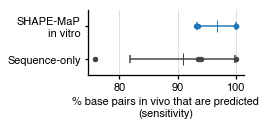

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(2.8,1.2))

ax.scatter(sens_shape,[1]*4,color='tab:blue',s=20,zorder=3)
ax.scatter(sens_seqon,[0]*4,color='#424242',s=20,zorder=3)

ax.errorbar(np.average(sens_shape),1,xerr=np.std(sens_shape),marker='|',linewidth=0,elinewidth=1.5,
            capsize=4,capthick=1.5,ms=12,color='tab:blue')
ax.errorbar(np.average(sens_seqon),0,xerr=np.std(sens_seqon),marker='|',linewidth=0,elinewidth=1.5,
            capsize=4,capthick=1.5,ms=12,color='#424242')

ax.set_ylim(-.5,1.5)
ax.set_yticks([1,0])
ax.set_yticklabels(['SHAPE-MaP\nin vitro','Sequence-only'])
ax.set_xlabel('% base pairs in vivo that are predicted\n(sensitivity)')
ax.xaxis.grid(ls='-')

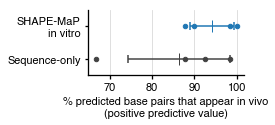

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(2.8,1.2))

ax.scatter(ppvs_shape,[1]*4,color='tab:blue',s=20,zorder=3)
ax.scatter(ppvs_seqon,[0]*4,color='#424242',s=20,zorder=3)

ax.errorbar(np.average(ppvs_shape),1,xerr=np.std(ppvs_shape),marker='|',linewidth=0,elinewidth=1.5,
            capsize=4,capthick=1.5,ms=12,color='tab:blue')
ax.errorbar(np.average(ppvs_seqon),0,xerr=np.std(ppvs_seqon),marker='|',linewidth=0,elinewidth=1.5,
            capsize=4,capthick=1.5,ms=12,color='#424242')

ax.set_ylim(-.5,1.5)
ax.set_yticks([1,0])
ax.set_yticklabels(['SHAPE-MaP\nin vitro','Sequence-only'])
ax.set_xlabel('% predicted base pairs that appear in vivo\n(positive predictive value)')
ax.xaxis.grid(ls='-')